# GIS-DAY 2024

## Frentes térmicos: detección y su impacto en la distribución de larvas de peces 

### M.C. Amelia Sánchez-Pérez

# Importar librerías

In [1]:
import numpy as np # soporte para crear vectores y matrices multidimensionales
import pandas as pd # manipulación y el análisis de datos
import xarray # manejo de matrices multidimensionales
import scipy # herramientas y algoritmos matemáticos
import scipy.signal #procesamiento de señales

import matplotlib # generación de gráficos
import matplotlib.pyplot as plt 
import cartopy # procesamiento de datos geográficos

# Mapa de TSM

In [2]:
#leer datos de TSM 
data = xarray.open_dataset("jplMURSST41_2e1a_a8a7_562c.nc")
data

<xarray.Dataset>
Dimensions:           (time: 11, latitude: 201, longitude: 301)
Coordinates:
  * time              (time) datetime64[ns] 2024-06-10T09:00:00 ... 2024-06-2...
  * latitude          (latitude) float32 28.0 28.01 28.02 ... 29.98 29.99 30.0
  * longitude         (longitude) float32 -114.0 -114.0 -114.0 ... -111.0 -111.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 ...
    analysis_error    (time, latitude, longitude) float64 ...
    mask              (time, latitude, longitude) float32 ...
    sea_ice_fraction  (time, latitude, longitude) float64 ...
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2024-06-20T09:00:00Z
    time_coverage_start:        2024-06-10T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -114.0

In [3]:
def draw_map(ax): # función para crear el mapa base 
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k')
    ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,180,1.))
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(-90,90,0.5))    

C:\Users\USER\AppData\Local\Temp\ipykernel_14820\123467936.py:2: RuntimeWarning: Mean of empty slice
  sst = np.nanmean(data.analysed_sst.data, axis=0) #calcular promedio ignorando nan


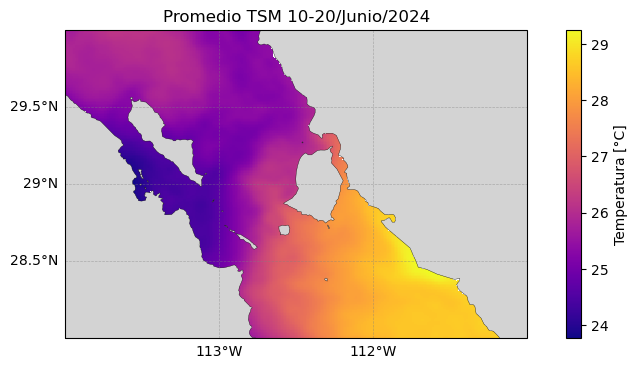

In [4]:
#Anliss de datos de TSM
sst = np.nanmean(data.analysed_sst.data, axis=0) #calcular promedio ignorando nan
#sst = np.nanmean(data.analysed_sst.data[0:6], axis=0) #promedio ignorando nan para primeros 5 días
#sst = data.analysed_sst.data[2] #graficar un día
lon_min, lon_max = -114, -111
lat_min, lat_max = 28, 30
extent = [lon_min, lon_max, lat_min, lat_max] #límites del mapa

fig = plt.figure(figsize=(10, 4)) #tamaño de la figura
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent)
draw_map(ax)

pc = ax.pcolor(data.longitude, data.latitude, sst, cmap="plasma") #graficar SST

plt.colorbar(pc, ax=ax, label="Temperatura [°C]") #barra de colores
plt.title("Promedio TSM 10-20/Junio/2024") #título del mapa
plt.show()

# Magnitud del Gradiente y Frentes Térmicos

In [5]:
sst_filtered = scipy.signal.medfilt(sst) #filtro de la mediana
Gx = np.zeros_like(sst_filtered) #crear arreglo relleno de ceros con las mimsas dimensiones de sst_filtered 
Gx[:,:-1] = np.diff(sst_filtered, axis=1) #diferencia en columnas
Gy = np.zeros_like(sst_filtered)
Gy[:-1,:] = np.diff(sst_filtered, axis=0) #diferencia en renglones
gm = np.sqrt(Gx**2 + Gy**2) #Importante:dividir entre km de resolución de tus datos --MURSST 1 km de resolución--



C:\Users\USER\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6613: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6614: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


(array([[41.,  0.,  0., ...,  0.,  0.,  2.],
        [43.,  0.,  0., ...,  0.,  0.,  0.],
        [44.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 0.        ,  2.57892727,  5.15785455,  7.73678182, 10.31570909,
        12.89463636, 15.47356364, 18.05249091, 20.63141818, 23.21034545,
        25.78927273]),
 <a list of 301 BarContainer objects>)

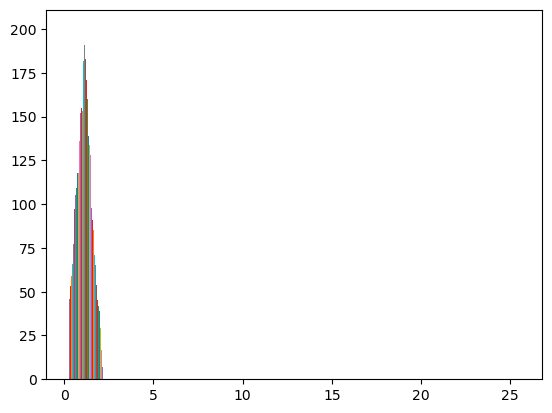

In [6]:
plt.hist(gm) #histograma de GM

(array([[20.,  8.,  8., ...,  0.,  0.,  0.],
        [14., 16., 11., ...,  0.,  0.,  0.],
        [18., 14., 10., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0.        , 0.01741288, 0.03482576, 0.05223864, 0.06965152,
        0.08706439, 0.10447727, 0.12189015, 0.13930303, 0.15671591,
        0.17412879]),
 <a list of 301 BarContainer objects>)

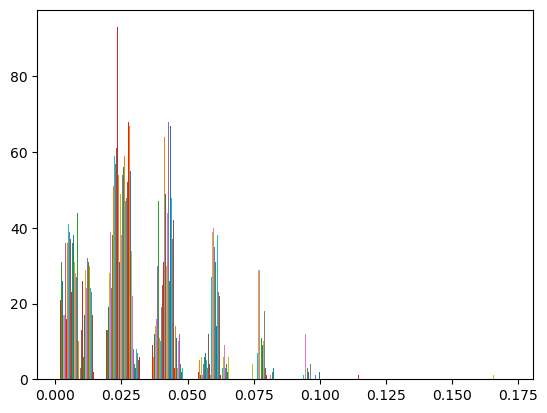

In [7]:
gm[gm > 5] = 0 #eliminar valores de gm por encima de 5

plt.hist(gm) #histograma

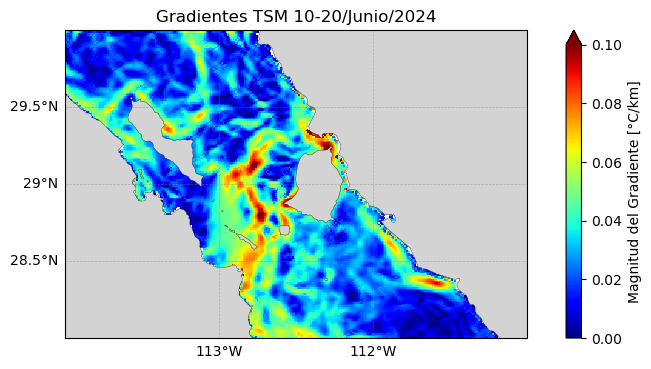

In [8]:
#grafica del gradiente
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent)
draw_map(ax)

pc = ax.pcolor(data.longitude, data.latitude, gm, cmap="jet", vmax=0.1) #vmax es límite máximo de colorbar

plt.colorbar(pc, ax=ax, label="Magnitud del Gradiente [°C/km]", extend="max") #extent significa que hay valores por encima del límite máximo del colorbar
plt.title("Gradientes TSM 10-20/Junio/2024")
plt.show()

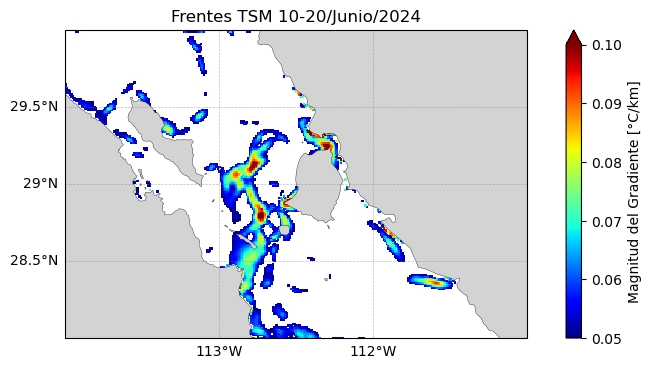

In [9]:
#graficar frentes
gm[gm < 0.05] = np.nan #límite para definir frentes

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent)
draw_map(ax)

pc = ax.pcolor(data.longitude, data.latitude, gm, cmap="jet", vmax=0.1)


plt.colorbar(pc, ax=ax, label="Magnitud del Gradiente [°C/km]", extend="max")
plt.title("Frentes TSM 10-20/Junio/2024")
plt.show()

# Frentes y larvas de peces

In [10]:
df = pd.read_csv("fish_larvae_concentration.csv", skiprows=3)
df

,longitude,latitude,concentration
0,-113.713385,29.602118,NaN
1,-113.565065,29.711380,NaN
2,-113.414612,29.821318,NaN
3,-113.262941,29.935895,NaN
4,-112.938534,29.872934,NaN
5,-113.038635,29.792984,5.0
6,-113.134460,29.716681,NaN
7,-113.236389,29.637933,NaN
8,-113.330996,29.560982,1.0
9,-113.148498,29.382707,11.0


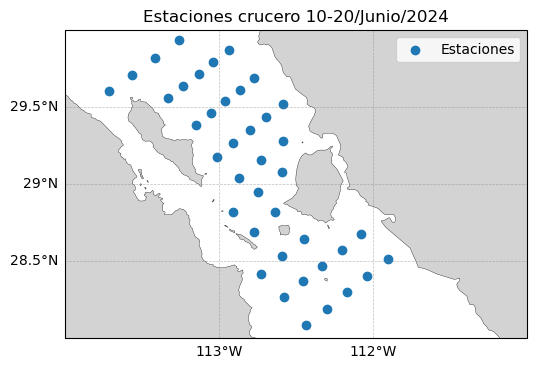

In [11]:
# Graficar estaciones
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent) 
draw_map(ax) 

ax.scatter(df.longitude, df.latitude, label="Estaciones") 

plt.legend()
plt.title("Estaciones crucero 10-20/Junio/2024")
plt.show()

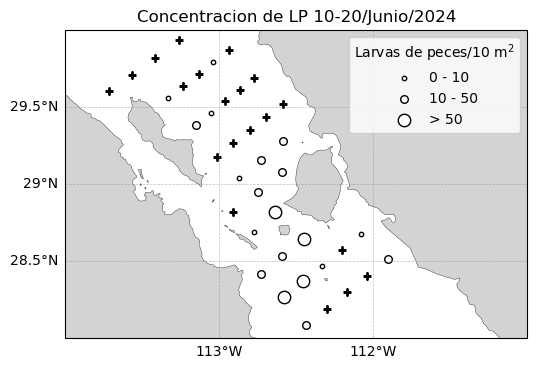

In [12]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent)
draw_map(ax)

#estaciones que no tienen larvas
nan_df = df[np.isnan(df.concentration)]
ax.scatter(nan_df.longitude, nan_df.latitude, marker="+", color="black", linewidth=2) 

#3 tamaños larvas de peces
low_df = df[df.concentration < 10]
ax.scatter(low_df.longitude, low_df.latitude, s=10, c="white", marker="o", edgecolor="black", label="0 - 10")

med_df = df[(df.concentration >= 10) & (df.concentration < 50)]
ax.scatter(med_df.longitude, med_df.latitude, s=30, c="white", marker="o", edgecolor="black", label="10 - 50")

high_df = df[(df.concentration >= 50)]
ax.scatter(high_df.longitude, high_df.latitude, s=80, c="white", marker="o", edgecolor="black", label="> 50")

plt.legend(title=r"Larvas de peces/10 m$^{2}$")
plt.title("Concentracion de LP 10-20/Junio/2024")
plt.show()

In [13]:
def plot_larvae(ax):
    nan_df = df[np.isnan(df.concentration)]
    ax.scatter(nan_df.longitude, nan_df.latitude, marker="+", color="black", linewidth=2)

    low_df = df[df.concentration < 10]
    ax.scatter(low_df.longitude, low_df.latitude, s=10, c="white", marker="o", edgecolor="black", label="0 - 10")

    med_df = df[(df.concentration >= 10) & (df.concentration < 50)]
    ax.scatter(med_df.longitude, med_df.latitude, s=30, c="white", marker="o", edgecolor="black", label="10 - 50")

    high_df = df[(df.concentration >= 50)]
    ax.scatter(high_df.longitude, high_df.latitude, s=80, c="white", marker="o", edgecolor="black", label="> 50")

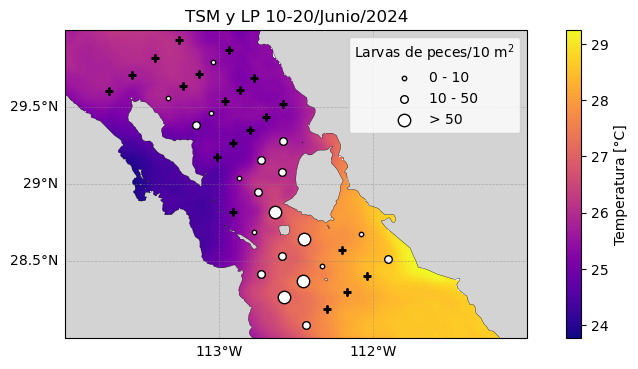

In [14]:
fig = plt.figure(figsize=(10, 4)) 
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent)
draw_map(ax)

pc = ax.pcolor(data.longitude, data.latitude, sst, cmap="plasma") 
plot_larvae(ax)

plt.colorbar(pc, ax=ax, label="Temperatura [°C]")
plt.legend(title=r"Larvas de peces/10 m$^{2}$")
plt.title("TSM y LP 10-20/Junio/2024")
plt.show()

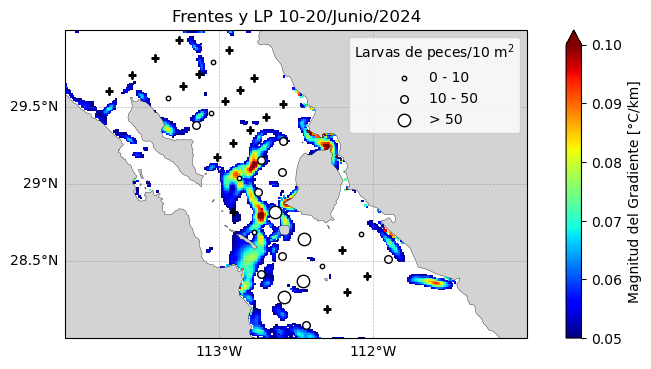

In [15]:
#Frentes+larvas
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent(extent)
draw_map(ax)

pc = ax.pcolor(data.longitude, data.latitude, gm, cmap="jet", vmax=0.1)
plot_larvae(ax)

plt.colorbar(pc, ax=ax, label="Magnitud del Gradiente [°C/km]", extend="max")
plt.legend(title=r"Larvas de peces/10 m$^{2}$")
plt.title("Frentes y LP 10-20/Junio/2024")
plt.show()